`https://public.tableau.com/app/profile/kezia.intan.natalie/viz/DashboardCarPricesinArgentina/DashboardCarPricesinArgentina?publish=yes` link tableau

# MILESTONE 1

### KEZIA INTAN NATALIE

### BATCH 003

# PROBLEM STATEMENT

Here I have the dataset from kaggle `https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices?select=argentina_cars.csv` the data is about car sales in Argentina.

I want to know total and average sales of car in Argentina for the last ten years which is 2013 until 2022, and divided into two. The first is from year 2013-2017, the second is from year 2018-2022.

- What brand of car is the most sales?
- What type of car is the most sales?
- When is the most sales?
- Where is the sales took place?
- Which color has the most sales?
- Which model has the most sales?
- How much total sales in 2013-2022?
- What is the average sales in 2013-2022?
- What is the average sales in 2013-2017?
- What is the average sales in 2018-2022?

# DATA LOADING

Import the library that we need

In [51]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Import the data from csv file

In [2]:
df = pd.read_csv('Argentina Car Prices.csv',encoding='latin1')

In [3]:
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.8,Sedán,9000,pesos


We have 510 rows and 12 columns

In [4]:
df.shape

(510, 12)

Checking the datatype of our data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   money       510 non-null    int64 
 1   brand       510 non-null    object
 2   model       510 non-null    object
 3   year        510 non-null    int64 
 4   color       499 non-null    object
 5   fuel_type   510 non-null    object
 6   door        510 non-null    int64 
 7   gear        509 non-null    object
 8   motor       499 non-null    object
 9   body_type   509 non-null    object
 10  kilometres  510 non-null    int64 
 11  currency    510 non-null    object
dtypes: int64(4), object(8)
memory usage: 47.9+ KB


# DATA CLEANING

Now we checking the missing value

In [6]:
df.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

We have to fill the missing value into *color* and *body_type* columns because we only need those columns

In [7]:
df.color.fillna('0', axis = 0, inplace = True)
df.body_type.fillna('0', axis = 0, inplace = True)

There is no more missing value

In [8]:
df.isnull().sum()

money          0
brand          0
model          0
year           0
color          0
fuel_type      0
door           0
gear           1
motor         11
body_type      0
kilometres     0
currency       0
dtype: int64

Now drop the columns that we don't need there are *door*, *motor*, *kilometres*, *gear* columns

In [9]:
df.drop(['door','motor','kilometres','gear'],axis = 1, inplace = True)

Cause we only need the last ten years, now we have to drop the years above 2013

In [10]:
df.drop(df[(df['year'] <= 2012)].index, inplace = True)

And we just want to use the dollar currency, so we drop the pesos currency

In [11]:
df.drop(df[(df['currency'] == 'pesos')].index, inplace = True)

Cause it use spanish we have to change it into english, from dolares into dollar

In [12]:
df['currency'] = df['currency'].replace(['dólares'], 'dollar')

Here is our new data

In [13]:
df

,money,brand,model,year,color,fuel_type,body_type,currency
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,SUV,dolar
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,SUV,dolar
5,34500,Jeep,Compass,2022,Negro,Nafta,SUV,dolar
6,25000,Kia,Sorento,2014,Negro,Diésel,SUV,dolar
8,35500,BMW,220,2016,Blanco,Nafta,Coupé,dolar
...,...,...,...,...,...,...,...,...
475,39990,Toyota,Hilux,2022,Gris,Diésel,Pick-Up,dolar
483,46990,Volkswagen,Golf,2018,Blanco,Nafta,Hatchback,dolar
486,90000,Jeep,Grand Cherokee,2017,Gris,Nafta,SUV,dolar
506,46000,Volkswagen,Amarok,2019,Gris,Diésel,Pick-Up,dolar


Now we want to import our new data back to csv file

In [14]:
data = df.to_csv('Argentina Car Prices 2013-2022.csv', index = True)
print('\nCSV String:\n', data)


CSV String:
 None


# DATA EXPLORATION

Now we check the unique of our data

In [15]:
df.nunique()

money        57
brand        16
model        38
year         10
color         8
fuel_type     3
body_type     6
currency      1
dtype: int64

Here we choose the *brand* column for our data visualization

In [49]:
df.brand.unique()

array(['Jeep', 'Citroën', 'Kia', 'BMW', 'Mercedes-Benz', 'Chevrolet',
       'Mini', 'Toyota', 'Peugeot', 'RAM', 'Hyundai', 'Volkswagen',
       'Fiat', 'Ford', 'Audi', 'Honda'], dtype=object)

Now count the value of each brand

In [17]:
df.brand.value_counts()

Volkswagen       10
Mercedes-Benz     9
Toyota            9
BMW               7
Jeep              5
RAM               5
Ford              3
Kia               2
Mini              2
Peugeot           2
Audi              2
Honda             2
Citroën           1
Chevrolet         1
Hyundai           1
Fiat              1
Name: brand, dtype: int64

And also the *body_type* column

In [46]:
df.body_type.value_counts()

SUV            18
Hatchback      16
Pick-Up        14
Coupé           7
Sedán           6
Monovolumen     1
Name: body_type, dtype: int64

And the *year* column

In [45]:
df.year.value_counts()

2022    14
2017     9
2016     7
2020     6
2019     6
2021     5
2014     4
2013     4
2018     4
2015     3
Name: year, dtype: int64

Now we want to know the most brand that sold using *.mode()* documentation

In [42]:
df.brand.mode()

0    Volkswagen
Name: brand, dtype: object

Also for the body_type

In [43]:
df.body_type.mode()

0    SUV
Name: body_type, dtype: object

And also the most sales year

In [44]:
df.year.mode()

0    2022
Name: year, dtype: int64

And also the color

In [69]:
df.color.mode()

0    Blanco
1      Gris
Name: color, dtype: object

And also the model

In [70]:
df.model.mode()

0       1500
1    Clase A
Name: model, dtype: object

Now count the total sales

In [71]:
df.money.sum()

3332797

And also count the average sales

In [72]:
df.money.mean()

53754.790322580644

# CENTRAL TENDENCY

Now we want to know the minimum, maximum, mean, median, and counting the money by brand

In [18]:
df.money.min()

8000

In [19]:
df.money.max()

430000

In [20]:
brand = df.groupby(['brand'])['money'].agg(['mean', 'median','count'])
brand['body_type'] = pd.DataFrame(df.groupby(['brand'])[['body_type']].agg(pd.Series.mode))
brand.sort_values(by='count',ascending = False)

,mean,median,count,body_type
brand,,,,
Volkswagen,28537.900000,25745.0,10,Hatchback
Mercedes-Benz,50053.222222,34990.0,9,Hatchback
Toyota,46229.888889,43000.0,9,Pick-Up
BMW,78155.714286,89990.0,7,Coupé
Jeep,47578.000000,35500.0,5,SUV
RAM,75178.000000,77500.0,5,Pick-Up
Ford,70133.333333,65900.0,3,Pick-Up
Audi,249000.000000,249000.0,2,"[Coupé, Hatchback]"
Honda,32450.000000,32450.0,2,SUV


Now we want to divided the year into two

The first one is from 2013-2017 and grouping by brand

In [21]:
brand_year1 = df.loc[df['year'] <= 2017]
brand_year1 = brand_year1.groupby('brand')['money'].mean().reset_index()
brand_year1

,brand,money
0,BMW,75600.000000
1,Ford,16500.000000
2,Honda,34900.000000
3,Hyundai,42900.000000
4,Jeep,55963.333333
5,Kia,19450.000000
6,Mercedes-Benz,33184.875000
7,Mini,17250.000000
8,Peugeot,28500.000000
9,Toyota,41990.000000


Count the total of sales

In [75]:
brand_year1_sum = brand_year1.sum()
brand_year1_sum

brand    BMWFordHondaHyundaiJeepKiaMercedes-BenzMiniPeu...
money                                        385438.008333
dtype: object

Now count the mean

In [22]:
brand_year1_mean = brand_year1.mean()
brand_year1_mean

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\2550601293.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year1.mean()


money    35039.818939
dtype: float64

Also count the median

In [23]:
brand_year1_median = brand_year1.median()
brand_year1_median

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\414942271.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year1.median()


money    33184.875
dtype: float64

Then count the mode

In [24]:
brand_year1_mode =  brand_year1.mode()
brand_year1_mode

,brand,money
0,BMW,16500.000000
1,Ford,17250.000000
2,Honda,19199.800000
3,Hyundai,19450.000000
4,Jeep,28500.000000
5,Kia,33184.875000
6,Mercedes-Benz,34900.000000
7,Mini,41990.000000
8,Peugeot,42900.000000
9,Toyota,55963.333333


And we want to count the quartiles by percentile

In [55]:
quartiles = percentile(brand_year1['money'], [25, 50, 75])

Here is the quartile 1

In [58]:
brand_year1_q1 = quartiles[0]
brand_year1_q1

19324.9

Here is the quartile 2 we also can say the median

In [60]:
brand_year1_q2 = quartiles[1]
brand_year1_q2

33184.875

Here is the quartile 3

In [61]:
brand_year1_q3 = quartiles[2]
brand_year1_q3

42445.0

And also count the variance

In [25]:
brand_year1_var = brand_year1.var()
brand_year1_var

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\1578015251.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year1.var()


money    3.393390e+08
dtype: float64

And also the standar deviation

In [26]:
brand_year1_std = brand_year1.std()
brand_year1_std

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\784881495.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year1.std()


money    18421.156322
dtype: float64

Now we plotting the *brand_year1* data

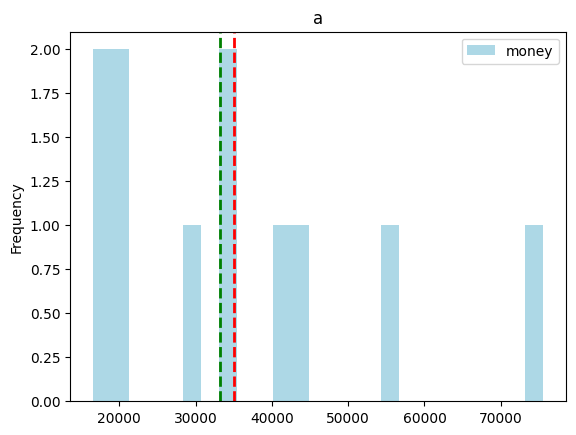

In [27]:
brand_year1.plot.hist(title='a', color='lightblue', bins=25)  
plt.axvline(brand_year1['money'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(brand_year1['money'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Now checking the skew

In [28]:
brand_year1_skew = brand_year1.skew()
brand_year1_skew

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\2766383026.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year1.skew()


money    1.107762
dtype: float64

Our data is highly skew because it is greater than 1

Now we want to checking the outliers by plotting using **seaborn** library

<AxesSubplot: ylabel='money'>

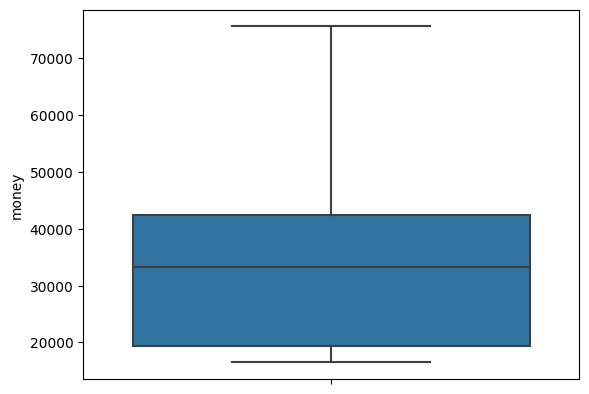

In [29]:
sns.boxplot(data=brand_year1, y = 'money')

The second one is from 2018-2022 and grouping by brand

In [30]:
brand_year2 = df.loc[df['year'] >= 2018]
brand_year2 = brand_year2.groupby('brand')['money'].mean().reset_index()
brand_year2

,brand,money
0,Audi,249000.000
1,BMW,79178.000
2,Chevrolet,38500.000
3,Citroën,19000.000
4,Fiat,26500.000
5,Ford,96950.000
6,Honda,30000.000
7,Jeep,35000.000
8,Mercedes-Benz,185000.000
9,Peugeot,17900.000


Count the total of sales

In [74]:
brand_year2_sum = brand_year2.sum()
brand_year2_sum

brand    AudiBMWChevroletCitroënFiatFordHondaJeepMerced...
money                                           936841.875
dtype: object

Now count the mean

In [31]:
brand_year2_mean = brand_year2.mean()
brand_year2_mean

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\598183900.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year2.mean()


money    72064.759615
dtype: float64

Also count the median

In [32]:
brand_year2_median = brand_year2.median()
brand_year2_median

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\1436684748.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year2.median()


money    38500.0
dtype: float64

And count the mode

In [33]:
brand_year2_mode = brand_year2.mode()
brand_year2_mode

,brand,money
0,Audi,17900.000
1,BMW,19000.000
2,Chevrolet,26500.000
3,Citroën,30000.000
4,Fiat,35000.000
5,Ford,37876.000
6,Honda,38500.000
7,Jeep,46759.875
8,Mercedes-Benz,75178.000
9,Peugeot,79178.000


And we want to count the quartiles by percentile

In [62]:
quartiles = percentile(brand_year2['money'], [25, 50, 75])

Here is the quartile 1

In [64]:
brand_year2_q1 = quartiles[0]
brand_year2_q1

30000.0

Here is the quartile 2 we also can say the median

In [66]:
brand_year2_q2 = quartiles[1]
brand_year2_q2

38500.0

Here is the quartile 3

In [68]:
brand_year2_q3 = quartiles[2]
brand_year2_q3

79178.0

And also count the variance

In [34]:
brand_year2_var = brand_year2.var()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\3561164222.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year2.var()


money    4.887074e+09
dtype: float64

And also count the standar deviation

In [35]:
brand_year2_std = brand_year2.std()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\4100853757.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year2.std()


money    69907.613221
dtype: float64

Now we want to plot the *brand_year2* data

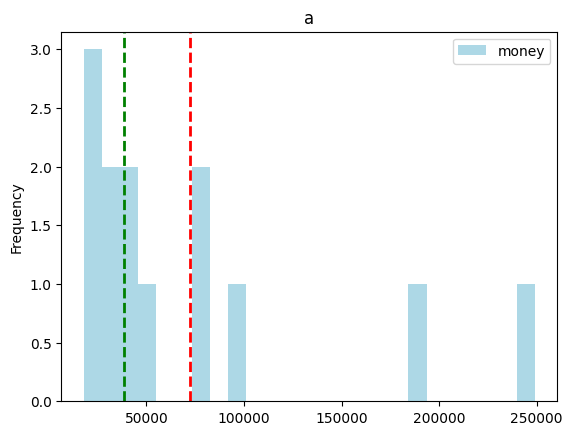

In [36]:
brand_year2.plot.hist(title='a', color='lightblue', bins=25)  
plt.axvline(brand_year2['money'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(brand_year2['money'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Now checking the skew

In [37]:
brand_year2_skew = brand_year2.skew()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17096\3602351480.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  brand_year2.skew()


money    1.83716
dtype: float64

Our data is highly skew because it is greater than 1

Now we want to checking the outliers by plotting using **seaborn** library

<AxesSubplot: ylabel='money'>

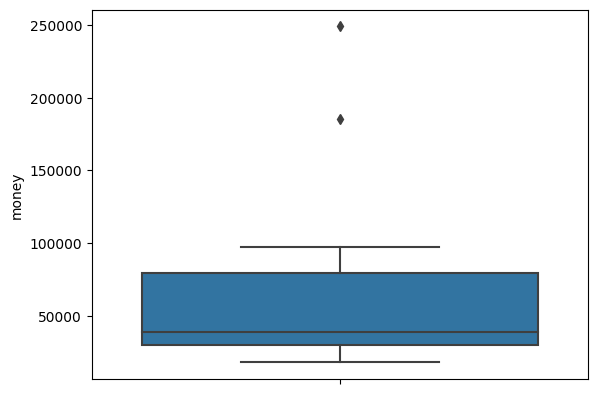

In [38]:
sns.boxplot(data=brand_year2, y = 'money')

As we can see there are two outliers but we don't have to drop it because it doesn't affect our data

# HYPOTHESIS TESTING

OUR HYPOTHESIS TESTING (2 SAMPLE 2 TAILED): 

H0 : &mu; Brand Sales per Year 2013-2017 = &mu; Brand Sales per Year 2018-2022

H1 : &mu; Brand Sales per Year 2013-2017 != &mu; Brand Sales per Year 2018-2022

Now for comparing the H0 with H1 we test using the t-test

In [39]:
t_stat, p_val = stats.ttest_ind(brand_year1['money'], brand_year2['money'])

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.10286229528783469
t-statistics: -1.7019164111957894


Now we plotting our t-test

-1064.984004389029
71144.62188317691


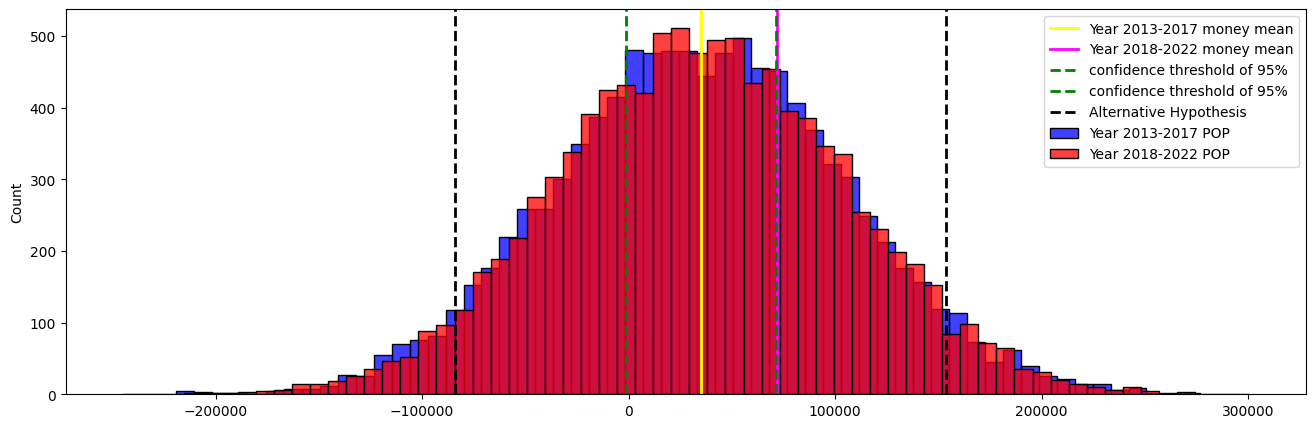

In [41]:
year1_pop = np.random.normal(brand_year1['money'].mean(),brand_year2['money'].std(),10000)
year2_pop = np.random.normal(brand_year1['money'].mean(),brand_year2['money'].std(),10000)

ci = stats.norm.interval(0.95, brand_year1['money'].mean(), brand_year1['money'].std())

plt.figure(figsize=(16,5))
sns.histplot(year1_pop, label='Year 2013-2017 POP',color='blue')
sns.histplot(year2_pop, label='Year 2018-2022 POP',color='red')

plt.axvline(brand_year1['money'].mean(), color='yellow', linewidth=2, label='Year 2013-2017 money mean')
plt.axvline(brand_year2['money'].mean(), color='magenta',  linewidth=2, label='Year 2018-2022 money mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(year1_pop.mean()+t_stat*year1_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(year2_pop.mean()-t_stat*year2_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])
print(ci[1])

From the result above we know that our data is not same so we failed to reject **H0**

# OVERALL ANALYSIS AND CONCLUSION

Here are our problem statement that now we already have the answer by analyzing our data

- What brand of car is the most sales?
   > Volkswagen
- What type of car is the most sales?
    > SUV
- When is the most sales?
    > In year 2022
- Where is the sales took place?
    > In Argentina
- Which color has the most sales?
    > There are Blanco and Gris
- Which model has the most sales?
    > Clase A
- How much total sales in 2013-2022?
    > 3.332.797$
- What is the average sales in 2013-2022?
    > 53.754,79$
- What is the average sales in 2013-2017?
    > 35.039,81$
- What is the average sales in 2018-2022?
    > 72.064,75$

So we now that the total sales in 2013 until 2017 are **385.438** &dollar; and for the total sales in 2018 until 2022 are **936.841** &dollar; which is there is increase in sales over the past ten years.